In [1]:
import sklearn 
import numpy as np
import pandas as pd
import warnings as wr
wr.filterwarnings('ignore')
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC

### linear model


In [2]:
train_data = pd.read_csv('train.csv')

In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
X = train_data.drop(['PassengerId','Ticket','Cabin'],axis=1)
y=X.Survived
X= X.drop(['Survived'],axis=1)

In [5]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(3), object(3)
memory usage: 55.8+ KB


In [6]:
### filling up missing values for all numerical data

 #Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns



In [7]:
missing_values_table(X)

Your selected dataframe has 8 columns.
There are 2 columns that have missing values.


,Missing Values,% of Total Values
Age,177,19.9
Embarked,2,0.2


In [8]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(3), object(3)
memory usage: 55.8+ KB


In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

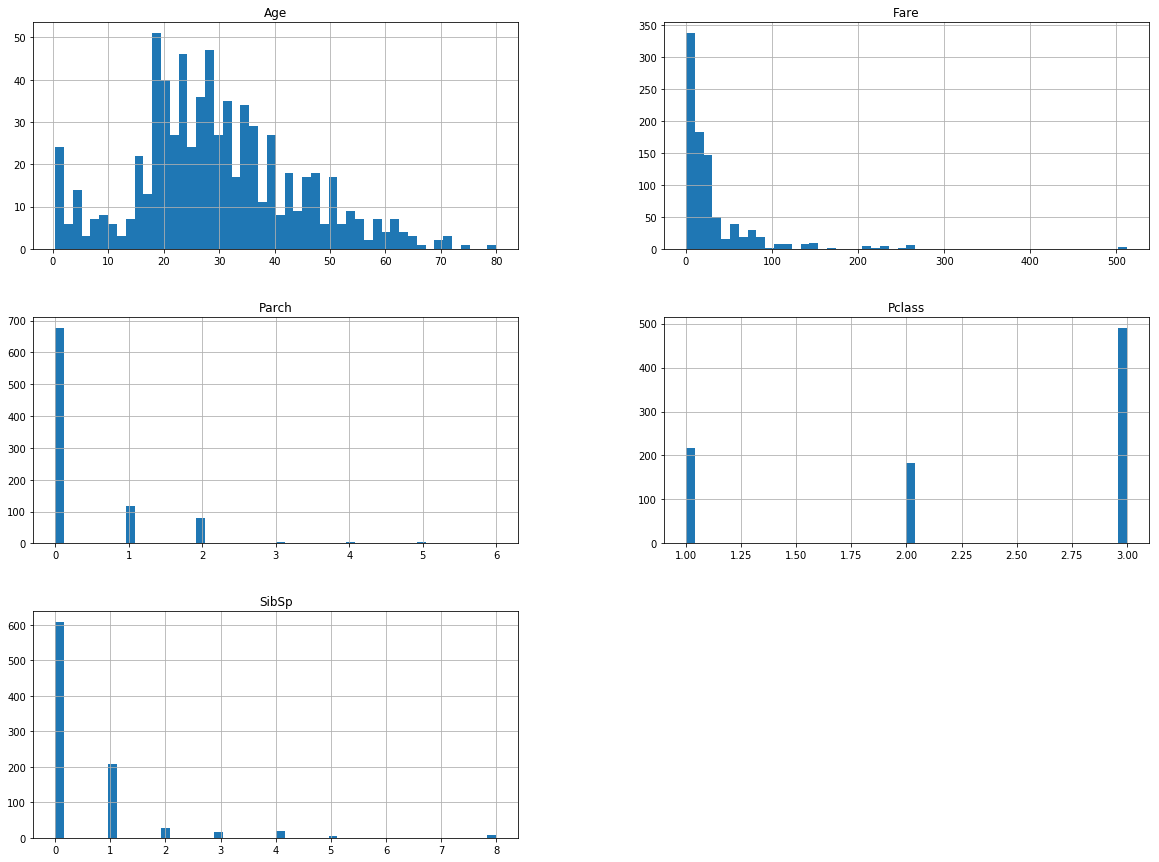

In [10]:
X.hist(bins=50,figsize=(20,15))
plt.show()

In [11]:
from sklearn.preprocessing import LabelEncoder
lableEncoder = LabelEncoder()
X.Sex = lableEncoder.fit_transform(X.Sex)
print("no. of null values in embarked: ",sum(X.Embarked.isnull())) 

no. of null values in embarked:  2


In [12]:
# fill the two values with one of the options (S, C or Q)
null_index = X.Embarked.isnull()
X.loc[null_index,'Embarked']='S'

dummies = pd.get_dummies(X.Embarked,prefix="Embarked")
X = X.drop(['Embarked'],axis=1)
X = pd.concat([X,dummies],axis=1)

X.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,0,0,1
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,1,0,0
2,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,0,0,1
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,0,0,1
4,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,0,0,1


In [13]:
#### filling up missing values in 
null_age = X.Age.isnull()
X.loc[null_age,'Age']=X.Age.median()

In [14]:
print("missing values in Age : ",sum(X.Age.isnull()))

missing values in Age :  0


In [15]:
corr_matrix = X.corr()
corr_matrix

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
Pclass,1.000000,0.131900,-0.339898,0.083081,0.018443,-0.549500,-0.243292,0.221009,0.074053
Sex,0.131900,1.000000,0.081163,-0.114631,-0.245489,-0.182333,-0.082853,-0.074115,0.119224
Age,-0.339898,0.081163,1.000000,-0.233296,-0.172482,0.096688,0.030248,-0.031415,-0.006729
SibSp,0.083081,-0.114631,-0.233296,1.000000,0.414838,0.159651,-0.059528,-0.026354,0.068734
Parch,0.018443,-0.245489,-0.172482,0.414838,1.000000,0.216225,-0.011069,-0.081228,0.060814
Fare,-0.549500,-0.182333,0.096688,0.159651,0.216225,1.000000,0.269335,-0.117216,-0.162184
Embarked_C,-0.243292,-0.082853,0.030248,-0.059528,-0.011069,0.269335,1.000000,-0.148258,-0.782742
Embarked_Q,0.221009,-0.074115,-0.031415,-0.026354,-0.081228,-0.117216,-0.148258,1.000000,-0.499421
Embarked_S,0.074053,0.119224,-0.006729,0.068734,0.060814,-0.162184,-0.782742,-0.499421,1.000000


In [16]:
X['Fare_Pclass'] = X['Fare']/X['Pclass']
X['Fare_Age'] = X['Fare']/X['Age']

In [17]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Embarked_C     891 non-null uint8
Embarked_Q     891 non-null uint8
Embarked_S     891 non-null uint8
Fare_Pclass    891 non-null float64
Fare_Age       891 non-null float64
dtypes: float64(4), int64(4), object(1), uint8(3)
memory usage: 65.3+ KB


In [18]:
corr_matrix = X.corr()
corr_matrix

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Fare_Pclass,Fare_Age
Pclass,1.000000,0.131900,-0.339898,0.083081,0.018443,-0.549500,-0.243292,0.221009,0.074053,-0.598631,-0.142529
Sex,0.131900,1.000000,0.081163,-0.114631,-0.245489,-0.182333,-0.082853,-0.074115,0.119224,-0.170627,-0.038601
Age,-0.339898,0.081163,1.000000,-0.233296,-0.172482,0.096688,0.030248,-0.031415,-0.006729,0.135839,-0.301814
SibSp,0.083081,-0.114631,-0.233296,1.000000,0.414838,0.159651,-0.059528,-0.026354,0.068734,0.062602,0.192251
Parch,0.018443,-0.245489,-0.172482,0.414838,1.000000,0.216225,-0.011069,-0.081228,0.060814,0.145265,0.254118
Fare,-0.549500,-0.182333,0.096688,0.159651,0.216225,1.000000,0.269335,-0.117216,-0.162184,0.988725,0.308026
Embarked_C,-0.243292,-0.082853,0.030248,-0.059528,-0.011069,0.269335,1.000000,-0.148258,-0.782742,0.288824,0.050902
Embarked_Q,0.221009,-0.074115,-0.031415,-0.026354,-0.081228,-0.117216,-0.148258,1.000000,-0.499421,-0.113993,-0.054297
Embarked_S,0.074053,0.119224,-0.006729,0.068734,0.060814,-0.162184,-0.782742,-0.499421,1.000000,-0.181286,-0.010423
Fare_Pclass,-0.598631,-0.170627,0.135839,0.062602,0.145265,0.988725,0.288824,-0.113993,-0.181286,1.000000,0.288603


In [19]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Embarked_C     891 non-null uint8
Embarked_Q     891 non-null uint8
Embarked_S     891 non-null uint8
Fare_Pclass    891 non-null float64
Fare_Age       891 non-null float64
dtypes: float64(4), int64(4), object(1), uint8(3)
memory usage: 65.3+ KB


In [20]:
X = X.drop(['Name'],axis=1)

In [21]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Fare_Pclass,Fare_Age
0,3,1,22.0,1,0,7.2500,0,0,1,2.416667,0.329545
1,1,0,38.0,1,0,71.2833,1,0,0,71.283300,1.875876
2,3,0,26.0,0,0,7.9250,0,0,1,2.641667,0.304808
3,1,0,35.0,1,0,53.1000,0,0,1,53.100000,1.517143
4,3,1,35.0,0,0,8.0500,0,0,1,2.683333,0.230000


In [22]:
############ data scalling in 0 or 1
## for age
a=X.shape[0]
for i in range(0,a):
  if (X.Age[i]>=18):
      X.Age[i]=1
  else:
    X.Age[i]=0
    
#### for Fare
for i in range(0,a):
  if (X.Fare[i]>=256):
      X.Fare[i]=1
  else:
    X.Fare[i]=0
    
### Fare_Pclass
for i in range(0,a):
  if (X.Fare_Pclass[i]>=256):
      X.Fare_Pclass[i]=1
  else:
    X.Fare_Pclass[i]=0
    
### for Fare_Age
for i in range(0,a):
  if (X.Fare_Age[i]>=82):
      X.Fare_Age[i]=1
  else:
    X.Fare_Age[i]=0


In [23]:
print(X.Fare_Age.min())

0.0


In [24]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Fare_Pclass,Fare_Age
0,3,1,1.0,1,0,0.0,0,0,1,0.0,0.0
1,1,0,1.0,1,0,0.0,1,0,0,0.0,0.0
2,3,0,1.0,0,0,0.0,0,0,1,0.0,0.0
3,1,0,1.0,1,0,0.0,0,0,1,0.0,0.0
4,3,1,1.0,0,0,0.0,0,0,1,0.0,0.0


In [25]:
#### split the data

In [26]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.10,random_state=42)

In [27]:

#-----------------------Logistic Regression---------------------------------------------
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(penalty='l2',random_state = 0)

# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X=X_train , y=y_train , cv = 10)
print("Logistic Regression:\n Accuracy:", accuracies.mean(), "+/-", accuracies.std(),"\n")



#-----------------------------------K-NN --------------------------------------------------

# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier_knn = KNeighborsClassifier(n_neighbors = 9, metric = 'minkowski', p = 3)


# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X=X_train , y=y_train , cv = 5)
classifier_knn.fit(X_train,y_train)
print("K-NN:\n Accuracy:", accuracies.mean(), "+/-", accuracies.std(),"\n")


#---------------------------------------SVM -------------------------------------------------

# Fitting Kernel SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)

# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X=X_train , y=y_train , cv = 10)
print("SVM:\n Accuracy:", accuracies.mean(), "+/-", accuracies.std(),"\n")


#---------------------------------Naive Bayes-------------------------------------------

# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()

# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X=X_train , y=y_train , cv = 10)
print("Naive Bayes:\n Accuracy:", accuracies.mean(), "+/-", accuracies.std(),"\n")









Logistic Regression:
 Accuracy: 0.7938611501797156 +/- 0.05410915936800114 

K-NN:
 Accuracy: 0.7989984472049689 +/- 0.04445073702501511 

SVM:
 Accuracy: 0.8100042975464916 +/- 0.049775920515579136 

Naive Bayes:
 Accuracy: 0.636526801062666 +/- 0.044618991129188094 



In [28]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier_rnd = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 42)

# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier_rnd, X=X_train , y=y_train , cv = 10)
classifier_rnd.fit(X_train,y_train)
print("Random Forest:\n Accuracy:", accuracies.mean(), "+/-", accuracies.std())

Random Forest:
 Accuracy: 0.8187716830754805 +/- 0.047649554210385824


In [29]:
### SVM- Support vector machine/Classifier
svm_clf = SVC()

In [30]:
print(cross_val_score(svm_clf,X_train,y_train,cv=2))

[0.81047382 0.7925    ]


In [31]:
accuricies = cross_val_score(svm_clf,X_train,y_train,cv=10)

In [32]:
print("SVM_accurecy : ",accuricies.mean())

SVM_accurecy :  0.8100042975464916


In [33]:
svm_clf.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [34]:
print(svm_clf.score(X_train,y_train))

0.8127340823970037


In [35]:
print(svm_clf.score(X_test,y_test))

0.8333333333333334


In [36]:
'''from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 42)

# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X=X_train , y=y_train , cv = 100)
print("Random Forest:\n Accuracy:", accuracies.mean(), "+/-", accuracies.std())'''

'from sklearn.ensemble import RandomForestClassifier\nclassifier = RandomForestClassifier(n_estimators = 100, criterion = \'entropy\', random_state = 42)\n\n# Applying k-Fold Cross Validation\nfrom sklearn.model_selection import cross_val_score\naccuracies = cross_val_score(estimator = classifier, X=X_train , y=y_train , cv = 100)\nprint("Random Forest:\n Accuracy:", accuracies.mean(), "+/-", accuracies.std())'

In [37]:
#rnd_clf = RandomForestClassifier(random_state=42)

In [38]:
#print(cross_val_score(rnd_clf,X_train,y_train))

In [39]:
#accure = cross_val_score(rnd_clf,X_train,y_train,cv=10)
#print("rnd_accurecy : ",accure.mean())

In [40]:
#rnd_clf.fit(X_train,y_train)

In [41]:
#print(rnd_clf.score(X_train,y_train))

In [42]:
#######-------------- test data analysis ---------------------

In [43]:
test_data = pd.read_csv('test.csv')

In [44]:
test_data.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [45]:
X_test_final = test_data.drop(['PassengerId','Ticket','Cabin'],axis=1)

In [46]:
missing_values_table(X_test_final)

Your selected dataframe has 8 columns.
There are 2 columns that have missing values.


,Missing Values,% of Total Values
Age,86,20.6
Fare,1,0.2


In [47]:
from sklearn.preprocessing import LabelEncoder
lableEncoder = LabelEncoder()
X_test_final.Sex = lableEncoder.fit_transform(X_test_final.Sex)

print("no. of null values in embarked: ",sum(X_test_final.Embarked.isnull())) 
 

no. of null values in embarked:  0


In [48]:
X_test_final.tail()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
413,3,"Spector, Mr. Woolf",1,NaN,0,0,8.0500,S
414,1,"Oliva y Ocana, Dona. Fermina",0,39.0,0,0,108.9000,C
415,3,"Saether, Mr. Simon Sivertsen",1,38.5,0,0,7.2500,S
416,3,"Ware, Mr. Frederick",1,NaN,0,0,8.0500,S
417,3,"Peter, Master. Michael J",1,NaN,1,1,22.3583,C


In [49]:
dummies_test = pd.get_dummies(X_test_final.Embarked,prefix="Embarked")
X_test_final = X_test_final.drop(['Embarked'],axis=1)
X_test_final = pd.concat([X_test_final,dummies_test],axis=1)



In [50]:
X_test_final.tail()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
413,3,"Spector, Mr. Woolf",1,NaN,0,0,8.0500,0,0,1
414,1,"Oliva y Ocana, Dona. Fermina",0,39.0,0,0,108.9000,1,0,0
415,3,"Saether, Mr. Simon Sivertsen",1,38.5,0,0,7.2500,0,0,1
416,3,"Ware, Mr. Frederick",1,NaN,0,0,8.0500,0,0,1
417,3,"Peter, Master. Michael J",1,NaN,1,1,22.3583,1,0,0


In [51]:
#### filling up missing values in 
null_age = X_test_final.Age.isnull()
X_test_final.loc[null_age,'Age']=X_test_final.Age.median()
print("missing values in Age Test Data : ",sum(X_test_final.Age.isnull()))

missing values in Age Test Data :  0


In [52]:
#### find missing value in fare
null_fare = X_test_final.Fare.isnull()
X_test_final.loc[null_fare,"Fare"]=7.5

In [53]:

X_test_final['Fare_Pclass'] = X_test_final['Fare']/X_test_final['Pclass']
X_test_final['Fare_Age'] = X_test_final['Fare']/X_test_final['Age']

In [54]:
X_test_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null int64
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           418 non-null float64
Embarked_C     418 non-null uint8
Embarked_Q     418 non-null uint8
Embarked_S     418 non-null uint8
Fare_Pclass    418 non-null float64
Fare_Age       418 non-null float64
dtypes: float64(4), int64(4), object(1), uint8(3)
memory usage: 30.7+ KB


In [55]:
X_test_final = X_test_final.drop(['Name'],axis=1)

In [56]:
X_test_final.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Fare_Pclass,Fare_Age
0,3,1,34.5,0,0,7.8292,0,1,0,2.609733,0.226933
1,3,0,47.0,1,0,7.0000,0,0,1,2.333333,0.148936
2,2,1,62.0,0,0,9.6875,0,1,0,4.843750,0.156250
3,3,1,27.0,0,0,8.6625,0,0,1,2.887500,0.320833
4,3,0,22.0,1,1,12.2875,0,0,1,4.095833,0.558523


In [57]:
print(X_test_final.Fare_Age.max())

121.02941176470587


In [58]:
############ data scalling in 0 or 1
## for age
a=X_test_final.shape[0]
for i in range(0,a):
  if (X_test_final.Age[i]>=18):
      X_test_final.Age[i]=0
  else:
    X_test_final.Age[i]=1
    
#### for Fare
for i in range(0,a):
  if (X_test_final.Fare[i]>=256):
      X_test_final.Fare[i]=0
  else:
    X_test_final.Fare[i]=1
    
### Fare_Pclass
for i in range(0,a):
  if (X_test_final.Fare_Pclass[i]>=256):
      X_test_final.Fare_Pclass[i]=0
  else:
    X_test_final.Fare_Pclass[i]=1
    
### for Fare_Age
for i in range(0,a):
  if (X_test_final.Fare_Age[i]>=60):
      X_test_final.Fare_Age[i]=1
  else:
    X_test_final.Fare_Age[i]=0


In [59]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Fare_Pclass,Fare_Age
0,3,1,1.0,1,0,0.0,0,0,1,0.0,0.0
1,1,0,1.0,1,0,0.0,1,0,0,0.0,0.0
2,3,0,1.0,0,0,0.0,0,0,1,0.0,0.0
3,1,0,1.0,1,0,0.0,0,0,1,0.0,0.0
4,3,1,1.0,0,0,0.0,0,0,1,0.0,0.0


In [60]:
predicted =  classifier_rnd.predict(X_test_final)
submission = pd.DataFrame({"PassengerId" : test_data['PassengerId'],"Survived":predicted})
submission.to_csv('sub_titSir.csv',index=False)
submission = pd.read_csv('sub_titSir.csv')

In [61]:
submission.sum()

PassengerId    460009
Survived          202
dtype: int64